# 模拟梯度下降法

## 梯度下降法的封装和实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_x = np.linspace(-1, 6, 141) # [-1, 6]等间距取141个点
plot_x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

In [3]:
plot_y = (plot_x - 2.5)**2 - 1 # 损失函数J

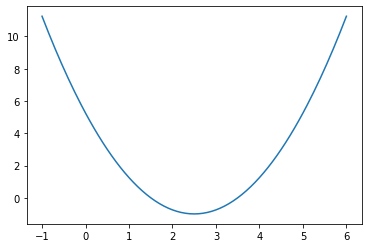

In [4]:
plt.plot(plot_x, plot_y)
plt.show()

In [5]:
# theta对应的导数
def dJ(theta):
    return 2*(theta - 2.5)
    

In [6]:
# theta对应的损失函数
def J(theta):
    try:
        return (theta - 2.5)**2 - 1
    except:
        return float("inf") # 防止梯度下降法结果收敛不了

In [7]:
theta = 0.0
eta = 0.1 # 学习率η
epsilon = 1e-8 # 接近0的定义

In [8]:
while True:
    gradient = dJ(theta) # 获取导数变换值
    last_theta = theta 
    theta = theta - eta * gradient # eta即η, theta即θ(指的是特征系数的取值，一个一维数组，不断变化使得J(θ)最小)
    
    # 比较差值是否越来越小.当变换接近于最小精度时，已经可以认为到达导数为0的点了
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break
        
print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


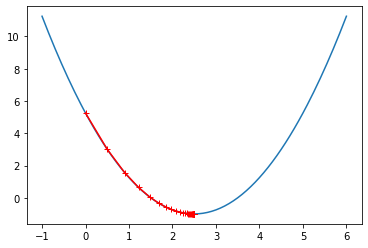

In [9]:
theta = 0.0
theta_history = [theta]
while True:
    gradient = dJ(theta) # 求导
    last_theta = theta 
    theta = theta - eta * gradient # -η*dJ
    # 把每次的theta存储到数组中，方便下面进行绘图
    theta_history.append(theta)
    
    # 比较损失函数的差值是否越来越小.当变化接近于最小精度时，已经可以认为到达导数为0的点了
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break
        
plt.plot(plot_x, J(plot_x)) # 画出整个曲线
plt.plot(np.array(theta_history), J(np.array(theta_history)), color = 'r', marker = '+') # 画出所有梯度下降法经过的点
plt.show()

In [10]:
len(theta_history) # 执行了46次，得到了导数为0的点

46

In [11]:
def gradient_descent(initial_theta,eta,epsilon=1e-8):
    """
    梯度下降法的封装
    """
    theta = initial_theta
    theta_history = [initial_theta]
    while True:
        gradient = dJ(theta)
        last_theta = theta 
        theta = theta - eta * gradient
        # 把每次的theta存储到数组中，方便下面进行绘图
        theta_history.append(theta)
        # print(theta)
        # 比较差值是否越来越小.当变换接近于最小经度时，已经可以人为到达导数为0的点了
        if(abs(J(theta) - J(last_theta)) < epsilon):
            print("累计查找的次数："+str(len(theta_history)))
            plot_theta_history(theta_history)
            break

In [12]:
def plot_theta_history(theta_history):
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color = 'r', marker = '+')
    plt.show()

## 下面分别对不同的η(即eta)进行测试，看下不同的η对收敛速度和收敛性的影响
> 一般η初始取0.01比较好

累计查找的次数：22


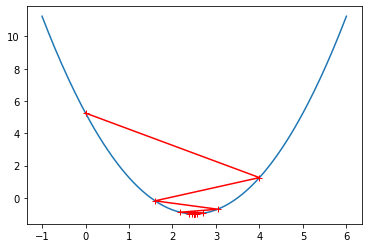

In [13]:
eta = 0.8 # 分别自己试试0.1、0.01、0.001；0.8、、
gradient_descent(0.,eta)

累计查找的次数：46


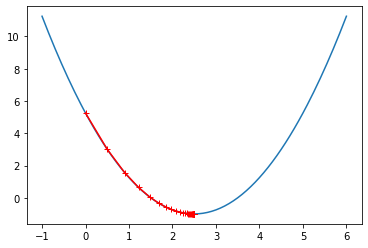

In [14]:
eta = 0.1 # 分别自己试试0.1、0.01、0.001；0.8、、
gradient_descent(0.,eta)

累计查找的次数：424


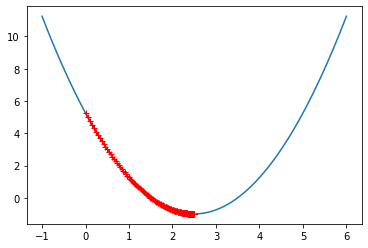

In [15]:
eta = 0.01 # 分别自己试试0.1、0.01、0.001；0.8、、
gradient_descent(0.,eta)

累计查找的次数：3682


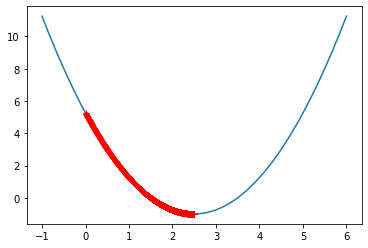

In [16]:
eta = 0.001 # 分别自己试试0.1、0.01、0.001；0.8、、
gradient_descent(0.,eta)

In [17]:
eta = 1.1 # 分别自己试试0.1、0.01、0.001；0.8；1.1的时候越蹦越高，收敛不了了
gradient_descent(0.,eta)

KeyboardInterrupt: 

In [18]:
def gradient_descent(initial_theta,eta,epsilon=1e-8,max_iters=10000): # max_iters:最大循环次数，防止无法首先时陷入死循环
    theta = initial_theta
    theta_history = [initial_theta]
    for i in range(0, max_iters): # 只梯度下降指定的次数，这样就不会出现上面死循环的情况了
        gradient = dJ(theta)
        last_theta = theta 
        theta = theta - eta * gradient
        # 把每次的theta存储到数组中，方便下面进行绘图
        theta_history.append(theta)
        # 比较差值是否越来越小.当变换接近于最小经度时，已经可以人为到达导数为0的点了
        if(abs(J(theta) - J(last_theta)) < epsilon):
            print("累计查找的次数："+str(len(theta_history)))
            plot_theta_history(theta_history)
            break
        if i==max_iters-1: # 一旦到达最大梯度下降的次数就直接绘图，不再继续梯度下降下去了
            plot_theta_history(theta_history)

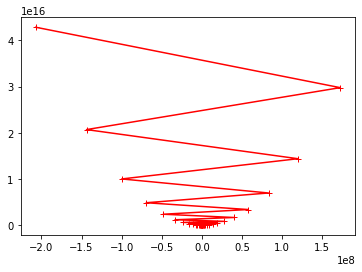

In [19]:
eta = 1.1 # 分别自己试试0.1、0.01、0.001；0.8；1.1的时候越蹦越高，收敛不了了,所以不会打印出图,这里指定迭代的最大次数
gradient_descent(0.,eta,max_iters=100)

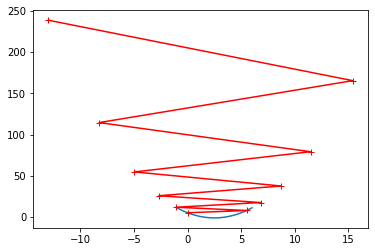

In [20]:
eta = 1.1 # 分别自己试试0.1、0.01、0.001；0.8；1.1的时候越蹦越高，收敛不了了,所以不会打印出图，这里指定迭代的最大次数
gradient_descent(0.,eta,max_iters=10) # 梯度下降次数少地时候还是可以看到最开始的损失函数J曲线地